In [48]:
!pip install yfinance pandas backtrader matplotlib

In [49]:
import yfinance as yf
import pandas as pd
import backtrader as bt
import matplotlib.pyplot as plt

In [50]:
# Fetch historical market data for a given stock ticker
ticker = 'NVDA'  # Example: Nvda.
data = yf.download(ticker, start='2023-01-01', end='2024-01-01')

# Display the first few rows of the data
print(data.head())


[*********************100%%**********************]  1 of 1 completed

              Open    High     Low   Close  Adj Close     Volume
Date                                                            
2023-01-03  14.851  14.996  14.096  14.315  14.306805  401277000
2023-01-04  14.567  14.853  14.241  14.749  14.740555  431324000
2023-01-05  14.491  14.564  14.148  14.265  14.256835  389168000
2023-01-06  14.474  15.010  14.034  14.859  14.850494  405044000
2023-01-09  15.284  16.056  15.141  15.628  15.619054  504231000


In [51]:
# Define a simple moving average crossover strategy
class SmaCross(bt.SignalStrategy):
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=10), bt.ind.SMA(period=30)
        self.crossover = bt.ind.CrossOver(sma1, sma2)

    def next(self):
        if self.crossover > 0:  # Golden cross
            self.buy()
            print(f'Buy signal on {self.data.datetime.date(0)} at price {self.data.close[0]}')
        elif self.crossover < 0:  # Death cross
            self.sell()
            print(f'Sell signal on {self.data.datetime.date(0)} at price {self.data.close[0]}')

# Create a Cerebro engine instance
cerebro = bt.Cerebro()

In [52]:
# Add the data feed
datafeed = bt.feeds.PandasData(dataname=data)
cerebro.adddata(datafeed)


In [53]:
# Add the trading strategy
cerebro.addstrategy(SmaCross)

# Set initial cash
cerebro.broker.set_cash(100000)

In [54]:
# Store the initial cash
initial_cash = cerebro.broker.get_cash()

# Run the strategy
cerebro.run()

# Store the final cash
final_cash = cerebro.broker.get_cash()

Sell signal on 2023-08-11 at price 40.85499954223633
Buy signal on 2023-08-28 at price 46.834999084472656
Sell signal on 2023-09-19 at price 43.52000045776367
Buy signal on 2023-10-12 at price 46.94499969482422
Sell signal on 2023-10-25 at price 41.77899932861328
Buy signal on 2023-11-10 at price 48.334999084472656
Sell signal on 2023-12-11 at price 46.62699890136719
Buy signal on 2023-12-20 at price 48.111000061035156


In [55]:
# Calculate portfolio return
portfolio_return = (final_cash - initial_cash) / initial_cash * 100
print(f'Portfolio return: {portfolio_return:.2f}%')

Portfolio return: -0.02%


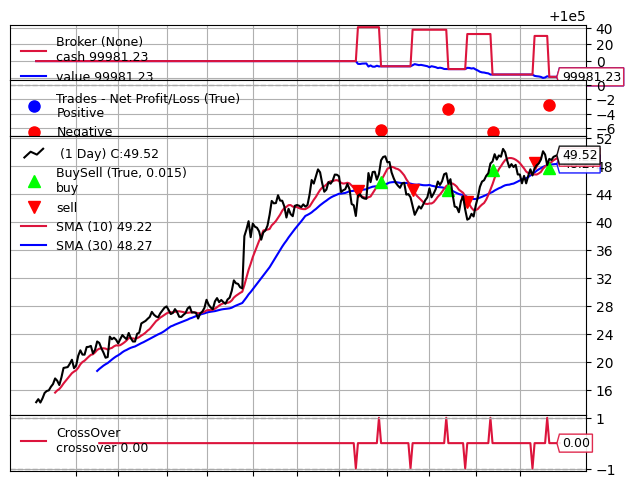

In [56]:
# Plot using Backtrader's plot method with matplotlib integration
fig = cerebro.plot(iplot=False, volume=False)[0][0]
fig.savefig('plot.png')
plt.show()